In [8]:

#!/usr/bin/env python
# coding: utf-8

# # WeatherPy
# ----
# 
# #### Note
# * Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# In[1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from urllib.error import HTTPError
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# ## Generate Cities List

# In[ ]:


# List for holding lat_lngs and cities
lat_lngs = []
cities = []


In [9]:

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

In [10]:
 ### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).

settings = {"units": "imperial","appid": api_key}

weather_data =[]

city_number=1

for city in cities:
    try:
        weather_data.append(owm.get_current(city, **settings))
        print(f"Processiong Record {city_number} | {city}")
        city_number+=1
    except:
        print("City not found. Skipping...")

        
    time.sleep(1)
    
print("---------------------")
print("fin")

Processiong Record 1 | jamestown
Processiong Record 2 | qaanaaq
Processiong Record 3 | yellowknife
Processiong Record 4 | tura
Processiong Record 5 | mackenzie
Processiong Record 6 | mataura
Processiong Record 7 | cape town
Processiong Record 8 | tiksi
Processiong Record 9 | hualmay
City not found. Skipping...
Processiong Record 10 | busselton
Processiong Record 11 | punta arenas
Processiong Record 12 | yerazgavors
Processiong Record 13 | saint-philippe
Processiong Record 14 | ventspils
Processiong Record 15 | seydi
Processiong Record 16 | vaini
Processiong Record 17 | kodiak
Processiong Record 18 | albany
City not found. Skipping...
Processiong Record 19 | zonhoven
Processiong Record 20 | atuona
Processiong Record 21 | gat
Processiong Record 22 | itamarandiba
Processiong Record 23 | fortuna
City not found. Skipping...
Processiong Record 24 | port talbot
Processiong Record 25 | ushuaia
Processiong Record 26 | avarua
Processiong Record 27 | wainwright
Processiong Record 28 | fayaoue
Pro

Processiong Record 226 | najran
Processiong Record 227 | los llanos de aridane
Processiong Record 228 | kankan
Processiong Record 229 | porto novo
Processiong Record 230 | plettenberg bay
City not found. Skipping...
Processiong Record 231 | nantucket
Processiong Record 232 | zhuhai
Processiong Record 233 | leningradskiy
Processiong Record 234 | manado
Processiong Record 235 | zhangjiakou
Processiong Record 236 | virginia beach
Processiong Record 237 | college
Processiong Record 238 | tigzirt
Processiong Record 239 | langsa
Processiong Record 240 | tolu
Processiong Record 241 | seoul
Processiong Record 242 | los chiles
Processiong Record 243 | laurel
Processiong Record 244 | mount gambier
Processiong Record 245 | zaozerne
Processiong Record 246 | kavieng
Processiong Record 247 | chuy
Processiong Record 248 | markala
Processiong Record 249 | manokwari
Processiong Record 250 | qasigiannguit
Processiong Record 251 | mamallapuram
Processiong Record 252 | iralaya
Processiong Record 253 | kur

Processiong Record 450 | lalmohan
Processiong Record 451 | huilong
Processiong Record 452 | tsabong
Processiong Record 453 | kangaatsiaq
Processiong Record 454 | huaraz
Processiong Record 455 | saldanha
Processiong Record 456 | padang
Processiong Record 457 | ambilobe
Processiong Record 458 | derzhavinsk
Processiong Record 459 | olinda
Processiong Record 460 | constitucion
Processiong Record 461 | creel
Processiong Record 462 | saint-pierre
Processiong Record 463 | peniche
Processiong Record 464 | laem sing
Processiong Record 465 | taltal
Processiong Record 466 | boden
Processiong Record 467 | ilo
Processiong Record 468 | anadyr
Processiong Record 469 | kirkenaer
Processiong Record 470 | baykit
Processiong Record 471 | abu samrah
City not found. Skipping...
Processiong Record 472 | bantou
Processiong Record 473 | khanpur
Processiong Record 474 | rio grande
Processiong Record 475 | muromtsevo
Processiong Record 476 | vught
Processiong Record 477 | wahpeton
Processiong Record 478 | abala

In [11]:

# ### Convert Raw Data to DataFrame
# * Export the city data into a .csv.
# * Display the DataFrame
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max","wind.speed"]

column_names = ["City","Cloudiness","Country","Date ","Humidity", "Lat","Lng", "Max Temp", "Wind Speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

weather_data_df = pd.DataFrame(data,columns=column_names)

city_weather_df=weather_data_df.set_index("City")

city_weather_count=city_weather_df.count()

print(city_weather_count)


Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64


In [14]:
city_weather_df

Cloudiness Country       Date   Humidity    Lat  \
City                                                                     
Jamestown                      90      US  1579059097        93  42.10   
Qaanaaq                        76      GL  1579059098        55  77.48   
Yellowknife                    75      CA  1579059084        73  62.46   
Tura                            0      IN  1579059100        56  25.52   
Mackenzie                      90      CA  1579059101        75  55.30   
Mataura                         0      NZ  1579059102        59 -46.19   
Cape Town                      75      ZA  1579059103        88 -33.93   
Tiksi                         100      RU  1579059104        88  71.69   
Hualmay                        95      PE  1579059105        84 -11.10   
Busselton                       0      AU  1579059107        27 -33.65   
Punta Arenas                   20      CL  1579058941        70 -53.15   
Yerazgavors                    40      AM  1579059109        78  40.70   
Saint-Philippe                  0      RE  1579059110        65 -21.36   
Ventspils                      90      LV  1579059077        87  57.39   
Seydi                          75      TM  1579059113        54  39.48   
Vaini                          40      TO  1579059114        74 -21.20   
Kodiak                         40      US  1579059115        53  57.79   
Albany                         90      US  1579059045        75  42.60   
Zonhoven                       43      BE  1579059118        71  50.99   
Atuona                          1      PF  1579059119        74  -9.80   
Kiryat Gat                     40      IL  1579059001        81  31.61   
Itamarandiba                   96      BR  1579059121        98 -17.86   
Fortuna                        75      US  1579059122        87  40.60   
Port Talbot                    40      GB  1579059124        81  51.59   
Ushuaia                        75      AR  1579058969        65 -54.80   
Avarua                         74      CK  1579059127        78 -21.21   
Wainwright                    100      CA  1579059128        93  52.84   
Fayaoue                        21      NC  1579059129        79 -20.65   
Aviles                         75      ES  1579059130        48  43.55   
Kruisfontein                    2      ZA  1579059131        95 -34.00   
...                           ...     ...         ...       ...    ...   
Camacupa                       97      AO  1579059702        93 -12.02   
Jeremoabo                       0      BR  1579059703        92 -10.07   
Buraidah                        7      SA  1579059704        69  26.33   
Emba                           92      KZ  1579059705        97  48.83   
Santa Cruz do Sul               0      BR  1579059706        85 -29.72   
Butembo                         1      CD  1579059708        72   0.15   
Hangu                           0      CN  1579059709        49  39.25   
Porbandar                       0      IN  1579059710        62  21.64   
Bosobolo                        0      CD  1579059711        45   4.18   
Labuhan                        96      ID  1579059712        72  -6.88   
Bakel                         100      SN  1579059713        13  14.90   
Reserva                        16      BR  1579059714        98 -24.65   
Mayumba                        81      GA  1579059715        78  -3.43   
Qashyr                        100      KZ  1579059716        94  53.07   
Risod                           0      IN  1579059717        66  19.97   
Jian                          100      CN  1579059718        94  27.12   
San Luis                       78      AR  1579059719        51 -33.30   
Awjilah                       100      LY  1579059720        84  29.11   
Lucea                          40      JM  1579059722        69  18.45   
Almeirim                       62      BR  1579059723        87  -1.52   
Abbeyfeale                     75      IE  1579059724        80  52.38   
San Quintin                

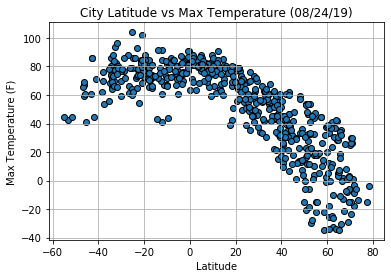

In [19]:

# ### Plotting the Data
# * Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# * Save the plotted figures as .pngs.

# #### Latitude vs. Temperature Plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", edgecolor='black')
plt.title("City Latitude vs Max Temperature (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig('Lat_Temp_Plot.png')
# #### Latitude vs. Humidity Plot

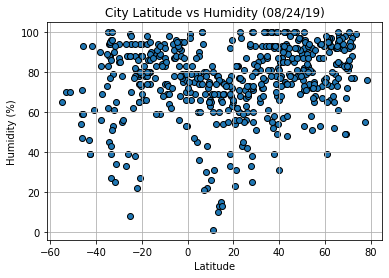

In [20]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", edgecolor='black')
plt.title("City Latitude vs Humidity (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('Lat_Humidity_Plot.png')# #### Latitude vs. Cloudiness Plot


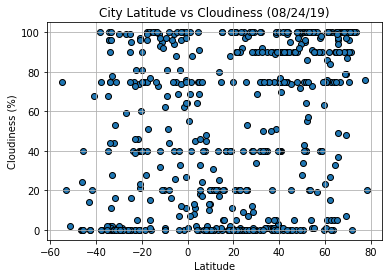

In [21]:

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", edgecolor='black')
plt.title("City Latitude vs Cloudiness (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig('Lat_Cloudiness_Plot.png')
# #### Latitude vs. Wind Speed Plot

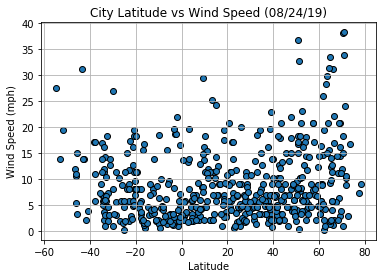

In [22]:


plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", edgecolor='black')
plt.title("City Latitude vs Wind Speed (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig('Lat_Wind_Plot.png')
